Pressure
500


ValueError: x and y must have same first dimension, but have shapes (1000,) and (500,)

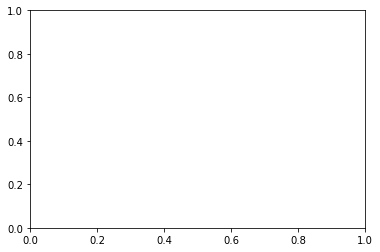

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import scipy.optimize as opt
import os
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
#check data format
print("Pressure")
data = np.loadtxt("C:/Users/49176/OneDrive - Universiteit Utrecht/ModSim/LJ_NVT/measurements.dat", skiprows=0).transpose()
p_old = data[1]
print(len(p_old))
rho = np.linspace(0,1.1,1000)
#print(rho)
for i in p_old:
    plt.plot(rho,data[1])
plt.show()

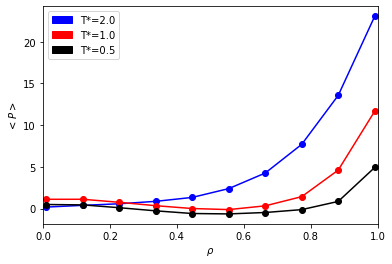

In [76]:
#Plot pressure
os.chdir("C:/Users/49176/OneDrive - Universiteit Utrecht/ModSim/LJ_NVT/measurements1")
rhos = np.linspace(0.01, 1.1, 11)
dic = {'000':'b', '001':'r', '002':'k'}
temps = ['000', '001', '002']

for temp in temps:
    avg_pressures = []
    for file in os.listdir(os.getcwd()):
        if ('beta_' + temp) in file:
            beta_i = file[18:18+3]
            try:
                data = np.loadtxt(file).transpose()
                pressures = data[1]
                avg_pressures.append(np.mean(pressures[:-200]))
            except:
                break     
    plt.plot(rhos[:len(avg_pressures)], avg_pressures, dic[temp]+'o')
    plt.plot(rhos[:len(avg_pressures)], avg_pressures, dic[temp]+'-')
    plt.legend(dic[temp])
    
blue_patch = mpatches.Patch(color='blue', label='T*=2.0')
red_patch = mpatches.Patch(color='red', label='T*=1.0')
black_patch = mpatches.Patch(color='black', label = 'T*=0.5')
plt.legend(handles=[blue_patch, red_patch, black_patch])
plt.xlim(0,1)
#plt.ylim(-3,10)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$<P>$')
plt.savefig('pressure_plot.pdf')

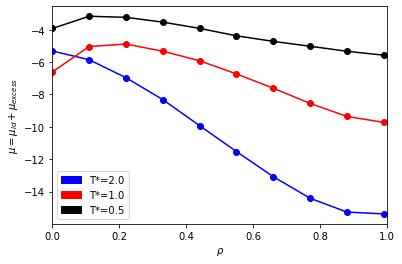

In [75]:
#plot chemical potential
os.chdir("C:/Users/49176/OneDrive - Universiteit Utrecht/ModSim/LJ_NVT/measurements1")
rhos = np.linspace(0.0, 1.1, 11)
dic = {'000':'b', '001':'r', '002':'k'}
temps = ['000', '001', '002']

for temp in temps:
    av_mu = []
    for file in os.listdir(os.getcwd()):
        if ('beta_' + temp) in file:
            beta_i = file[18:18+3]
            try:
                data = np.loadtxt(file).transpose()
                mu = data[2]
                av_mu.append(np.mean(mu[:-200]))
            except:
                break     
    plt.plot(rhos[:len(av_mu)], av_mu, dic[temp]+'o')
    plt.plot(rhos[:len(av_mu)], av_mu, dic[temp]+'-')
    plt.legend(dic[temp])
blue_patch = mpatches.Patch(color='blue', label='T*=2.0')
red_patch = mpatches.Patch(color='red', label='T*=1.0')
black_patch = mpatches.Patch(color='black', label = 'T*=0.5')
plt.legend(handles=[blue_patch, red_patch, black_patch])
plt.xlim(0,1)
#plt.ylim(-15,5)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\mu = \mu_{id} + \mu_{excess} $')
plt.savefig('mu_plot.pdf')